In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip
from tensorflow import keras
import pandas as pd
import seaborn as sns

import sys, os 
path = os.path.abspath("..")
sys.path.append(path)    
 
from training_utils import *

In [45]:
dataset = load_datasets("../datasets")
dataset_ann = load_datasets("../datasets_ann2")

In [46]:
def evaluate_datasets(dataset1, dataset2, feature="P",  fro=0, to=-1):
    mse = list()
    plate = list()
    size = list()
    mat = list()
    for jobname, db in dataset1.items():
        db2 = dataset2[jobname]
        paras = jobname.split('_')
        p1 = db[feature][fro:to]
        p2 = db2[feature][fro:to]
        e = (p1-p2)
        mse.append(np.abs(e).mean())
        plate.append(paras[0])
        size.append(paras[1])
        mat.append(f"{paras[2]}_{paras[3]}")

    df = pd.DataFrame()
    df["MSE"] = mse
    df["Plate"] = plate
    df["Mesh size"] = size
    df["Material_Amplitude"] = mat
    df["Job"] = dataset.keys()
    
    return df

In [47]:
df_pressure = evaluate_datasets(dataset, dataset_ann, feature="P")

In [48]:
df_damage = evaluate_datasets(dataset, dataset_ann, feature="D", fro=-2)

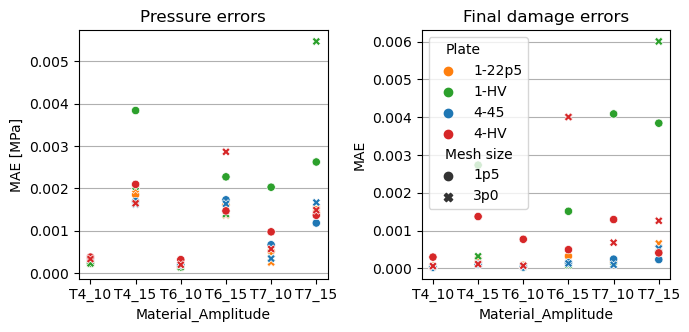

In [57]:
value_dict = {"4-45":"tab:blue", "4-HV":"tab:red", "1-HV":"tab:green", "1-22p5":"tab:orange"}
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(7,4), sharex=True,subplot_kw=dict(box_aspect=1))
ax1 = sns.scatterplot(ax=ax1,data=df_pressure, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size", legend=None)
ax2 = sns.scatterplot(ax=ax2,data=df_damage, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict,style="Mesh size")

axs = [ax1,ax2]
titles = ["Pressure errors", "Final damage errors"]

for ax,title in zip(axs,titles):
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    ax.set_title(title)
    ax.set_ylabel("MAE")
fig.tight_layout()
ax1.set_ylabel("MAE [MPa]")
ax2.set_ylabel("MAE")
fig.savefig(f"ann_test.pdf", bbox_inches="tight")
plt.show()

In [50]:
job_p = df_pressure[df_pressure.MSE == df_pressure.MSE.max()].iloc[0].Job
job_d = df_damage[df_damage.MSE == df_damage.MSE.max()].iloc[0].Job
job_d = "1-HV_1p5_T7_10"

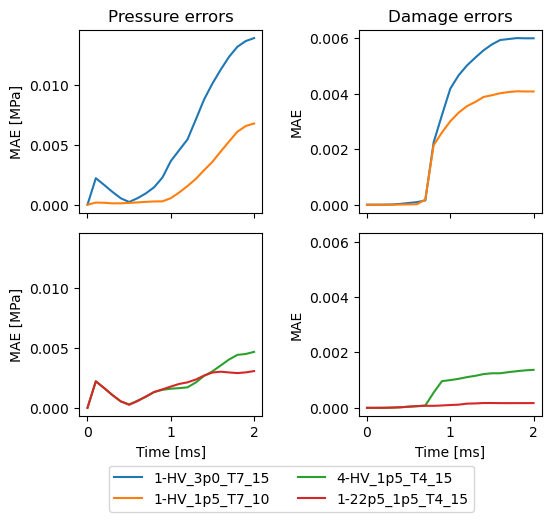

In [51]:
job = job_p

db = dataset[job]
db2 = dataset_ann[job]

P1 = db["P"]
P2 = db2["P"]

D1 = db["D"]
D2 = db2["D"]

t = db["PLAG"][:-1,0]*1000
error_p = np.array([np.abs(e).mean() for e in (P2-P1)])[:-1]
error_d = np.array([np.abs(e).mean() for e in (D2-D1)])[:-1]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, sharey="col", subplot_kw=dict(box_aspect=1, xlabel="Time [ms]"))

ax1.plot(t, error_p, label=job_p)
ax1.set_title("Pressure errors")
ax2.plot(t, error_d)
ax2.set_title("Damage errors")


job = job_d

db = dataset[job]
db2 = dataset_ann[job]

P1 = db["P"]
P2 = db2["P"]

D1 = db["D"]
D2 = db2["D"]

t = db["PLAG"][:-1,0]*1000
error_p = np.array([np.abs(e).mean() for e in (P2-P1)])[:-1]
error_d = np.array([np.abs(e).mean() for e in (D2-D1)])[:-1]

ax1.plot(t, error_p, color="tab:orange", label=job)
ax1.set_ylabel("MAE [MPa]")
ax2.plot(t, error_d, color="tab:orange")
ax2.set_ylabel("MAE")

job = "4-HV_1p5_T4_15"

db = dataset[job]
db2 = dataset_ann[job]

P1 = db["P"]
P2 = db2["P"]

D1 = db["D"]
D2 = db2["D"]

t = db["PLAG"][:-1,0]*1000
error_p = np.array([np.abs(e).mean() for e in (P2-P1)])[:-1]
error_d = np.array([np.abs(e).mean() for e in (D2-D1)])[:-1]
ax3.plot(t, error_p, color="tab:green", label=job)
ax3.set_ylabel("MAE [MPa]")
ax4.plot(t, error_d, color="tab:green")
ax4.set_ylabel("MAE")

job = "1-22p5_1p5_T4_15"

db = dataset[job]
db2 = dataset_ann[job]

P1 = db["P"]
P2 = db2["P"]

D1 = db["D"]
D2 = db2["D"]

t = db["PLAG"][:-1,0]*1000
error_p = np.array([np.abs(e).mean() for e in (P2-P1)])[:-1]
error_d = np.array([np.abs(e).mean() for e in (D2-D1)])[:-1]
ax3.plot(t, error_p, color="tab:red", label=job)
ax4.plot(t, error_d, color="tab:red")



fig.tight_layout()
fig.set_figwidth(6)
fig.legend( loc='center', bbox_to_anchor=(0.5, -0.03), ncol=2)
fig.savefig(f"ann_time.pdf", bbox_inches="tight")
plt.show()

5033


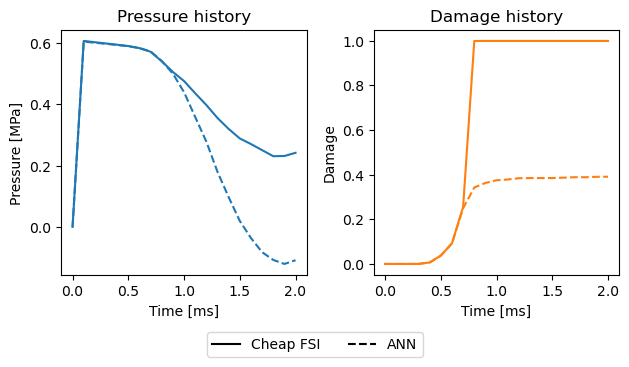

In [52]:
job = "1-HV_3p0_T7_15"

db = dataset[job]
db2 = dataset_ann[job]

P1 = db["P"]
P2 = db2["P"]

D1 = db["D"]
D2 = db2["D"]

t = db["PLAG"][:-1,0]*1000
e_p = np.abs(P2-P1)
e_d = np.abs(D2-D1)

error_p = np.array([e_p[:-1,i].mean() for i in range(len(e_p[0]))])
error_d = np.array([e_d[:-1,i].mean() for i in range(len(e_d[0]))])

i = error_d.argmax()
print(db["labels"][i])

fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, sharey="col", subplot_kw=dict(box_aspect=1, xlabel="Time [ms]"))
ax1.plot(t, P1[:-1,i], color="tab:blue")
ax1.plot(t, P2[:-1,i], color="tab:blue", linestyle="dashed")
ax1.set_title("Pressure history")
ax1.set_ylabel("Pressure [MPa]")

ax2.plot(t, D1[:-1,i,0], color="tab:orange")
ax2.plot(t, D2[:-1,i,0], color="tab:orange", linestyle="dashed")
ax2.set_title("Damage history")
ax2.set_ylabel("Damage")
fig.tight_layout()
import matplotlib.lines as mlines
fsi_line = mlines.Line2D([], [], color='black', linestyle="solid", label='Cheap FSI')
ann_line = mlines.Line2D([], [], color='black', linestyle="dashed", label='ANN')
fig.legend(handles=[fsi_line, ann_line], loc='center', bbox_to_anchor=(0.5, 0.1), ncol=2)
fig.savefig(f"ann_element.pdf", bbox_inches="tight")
plt.show()

In [53]:
with gzip.open("../parameter_study/para.pkl.gz","r+b") as f:
        dic = pickle.load(f)
        para = dic["para7"]

In [54]:
model = para["model"]
xn = para["X_norms"]
yn = para["Y_norms"]

df = evaluate_model(model, dataset, xn, yn)

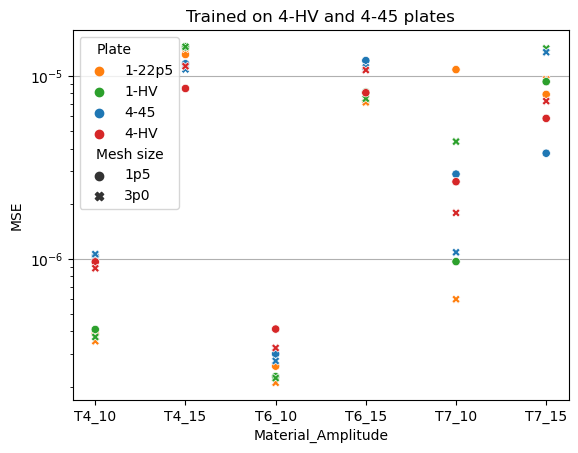

In [55]:
value_dict = {"4-45":"tab:blue", "4-HV":"tab:red", "1-HV":"tab:green", "1-22p5":"tab:orange"}
ax1 = sns.scatterplot(data=df, y="MSE", x="Material_Amplitude", hue="Plate", palette=value_dict, style="Mesh size")
ax1.set_axisbelow(True)
ax1.grid(axis='y')
ax1.semilogy()
ax1.set_title("Trained on 4-HV and 4-45 plates")
plt.savefig("4slit.svg",bbox_inches="tight")
plt.show()